# Graphique exploratoire de la base *allocine*

In [22]:
import pandas as pd
import spacy
import seaborn as sns
from datasets import load_dataset

In [13]:
dataset_allocine = load_dataset("allocine")
nlp = spacy.load('fr_core_news_sm', disable=["tagger", "parser","ner"])

Reusing dataset allocine_dataset (C:\Users\khale\.cache\huggingface\datasets\allocine_dataset\allocine\1.0.0\bbee2ebb45a067891973b91ebdd40a93598d1e2dd5710b6714cdc2cd81d0ed65)


In [14]:
def tokenizer(exemple):
    return [X.lemma_ for X in nlp(exemple) if X.is_alpha & (not(X.is_stop))]

In [15]:
allo_train = pd.DataFrame(dataset_allocine["train"]).apply(lambda x : tokenizer(x["review"]), axis = 1)

Distribution des longueurs des phrases dans le training set

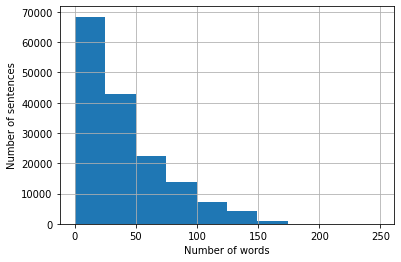

In [29]:
mots_train = allo_train.apply(lambda x : len(x)).hist()
mots_train.set_xlabel("Number of words")
mots_train.set_ylabel("Number of sentences")

mots_train.get_figure().savefig('hist_train_word.png')